# NB 11a:  Linear Regression Inference 


In [1]:
##Get them stats in here: the essentials
import numpy as np 
import pandas as pd 
from scipy import stats
import statsmodels.api as sm #this line is now always in our opener
import matplotlib.pylab as plt 
%matplotlib inline

#A few niceties you're also welcome to use.
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant
import seaborn as sns #for pairsplots


## Exercise 1:  Creating a SLR

Import the data LungDisease.csv and create a scatter plot:

In [10]:
dfLung = pd.read_csv("LungDisease.csv")

dfLung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


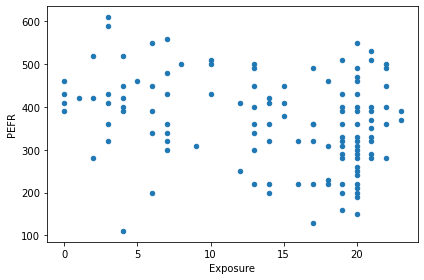

In [11]:
dfLung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

- Create a linear regression model using the `OLS` method from `statsmodels`.   
 To include an intercept in your model you will need to use the sm.add_constant for the x term (see below).  
 - Print the resulting `summary` table 
- Typeset the actual line of best fit (as a print statement or in a markdown cell), using the coefficients from your fit.  (See: `.params`.)



In [37]:
lmLung=sm.OLS(dfLung['PEFR'], sm.add_constant(dfLung['Exposure'])).fit()
lmLung.summary()

print("Fitted Model: Y = {:.5f} + {:.5f}x".format(lmLung.params[0], lmLung.params[1]))

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Wed, 19 Apr 2023   Prob (F-statistic):            0.00201
Time:                        12:42:44   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.5828     20.796     20.417      0.0

Interpret the coefficients in your model:


The intercept, or b0 , is 424.583 and can be interpreted as the predicted PEFR for a
worker with zero years exposure. The regression coefficient, or b1, can be interpreted
as follows: for each additional year that a worker is exposed to cotton dust, the work‐
er’s PEFR measurement is reduced by –4.185

 Make the following 4 plots:


i).  A scatter plot of the data set with overlay the line of best least-squares fit.

ii).  A histogram of *residuals* of best least-squares fit.  

iii).  A Q-Q plot of *residuals*, comparing to a normal distribution.

iv).  A scatter plot where the original x-values are the x-axis and the *residuals* are the y-axis 

Text(0.5, 1.0, 'Data and Fit')

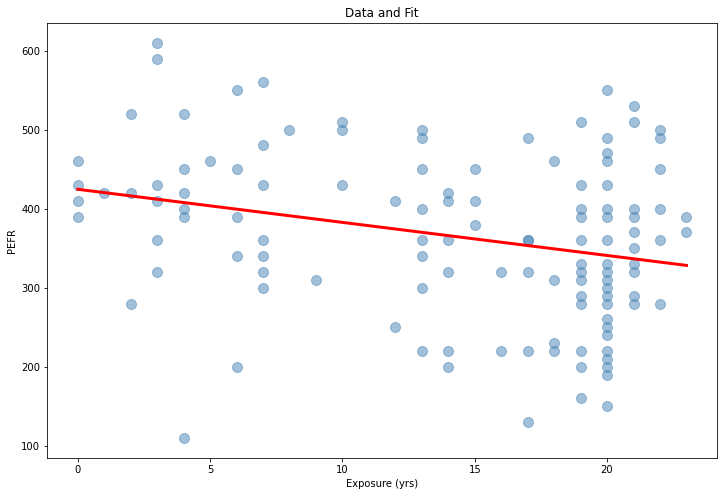

In [16]:
fig, ax= plt.subplots(figsize=(12,8))
ax.scatter(dfLung['Exposure'], dfLung['PEFR'],color="steelblue", alpha=0.5, s=100)
ax.plot( dfLung['Exposure'], lmLung.fittedvalues,color='red',lw=3)
ax.set_xlabel('Exposure (yrs)')
ax.set_ylabel('PEFR')
ax.set_title('Data and Fit')


Text(0.5, 1.0, 'Histogram of Residuals')

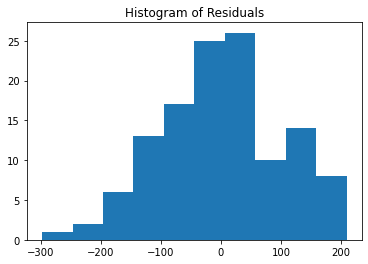

In [17]:
fig, ax= plt.subplots(figsize=(6,4))

ax.hist(lmLung.resid)
ax.set_title('Histogram of Residuals')

Figure(432x288)


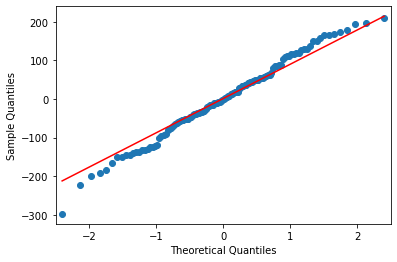

In [22]:
print(sm.qqplot(lmLung.resid,line='q'))

In [ ]:
sm.qqplot(lm.resid,line='q')

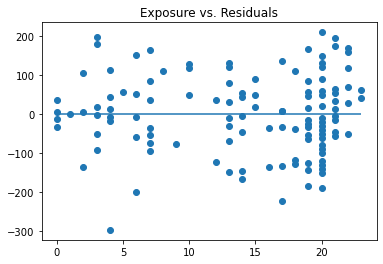

In [15]:
fig, ax= plt.subplots(figsize=(6,4))

ax.scatter(dfLung["Exposure"], lmLung.resid)
ax.set_title('Exposure vs. Residuals')
ax.hlines(0, xmin=np.min(dfLung['Exposure']), xmax=np.max(dfLung['Exposure']))

Use your plots to decide whether or not the data set meets the 4 major assumptions for SLR. Explain your reasoning.

## Exercise 2:  Analyzing Regression Assumptions for Different Models



Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.  If the model violates any assumptions, consider the following "corrections:"
 - adding higher powers of $x$ to the model to address concavity/curvature/nonlinearity
 - removing outlying data points, and explaining how this affects the model **inference**
 - removing high leverage data points, and explaining how this affects the model **inference**
 - doing nothing, but describing which assumptions might be broken and some possible implications


In [32]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)


### Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [34]:
df1=df.loc[df['dataset']=='I']
Y, X = dmatrices('y ~ x', data=df1)
lm1=sm.OLS(Y,X).fit()
lm1.summary()

/Users/maribethoscamou/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 19 Apr 2023   Prob (F-statistic):            0.00217
Time:                        12:39:07   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

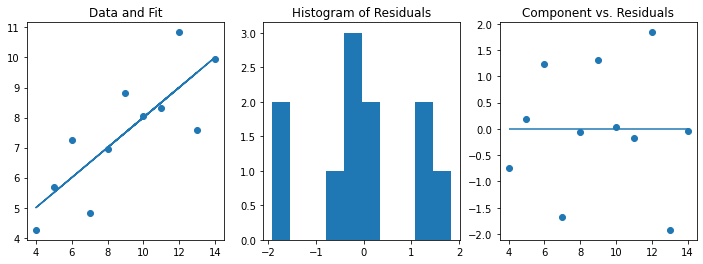

In [35]:
#all plots:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(df1['x'], df1['y'])
ax[0].plot( df1['x'], lm1.fittedvalues)
ax[0].set_title('Data and Fit')
ax[1].hist(lm1.resid)
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(df1['x'], lm1.resid)
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(df1['x']), xmax=np.max(df1['x']))

#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

Overall, this model looks good!  There are some "big miss" of outliers, but that's probably not enough for us to fully discord normality.  The residuals are probably close enough to normal, and there's no obvious structure.

#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another table and set of plots as in parts A and B of the new fit and the new residuals.

What can we do here?  Not much!  It doesn't look like we should square x, so it's probably best to just let 

#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

All of these data sets have very small sample sizes, so we should be hesitant to conclude too much in general: as is this looks pretty reasonable, and an $R^2$ of 96% isn't too bad!

##  Exercise 4:  Confidence Bands vs Prediction Bands

From lecture, we have mentioned confidence intervals:

There are more types on confidence intervals we may care about!

- Last slide was how to perform inference on the parameters of the line $\beta$. We also might care about inference on values of Y !
    
- A confidence band is how sure we are about the mean of Y at specific values of X, or $E[Y|X]$.
    
- A prediction band is how we estimate the distribution of new Y observations at specific values of X. It's the same as the confidence band, but also includes our estimate for $\varepsilon$.

Let's look at how to generate all 3 of these, and also consider the errors from our usual estimators:

$$s.e.(\hat{\beta_0})= \sigma \sqrt{\frac{1}{n}+\frac{\bar{X}^2}{\left(\sum X_i-\bar{X} \right)^2}}; \qquad s.e.(\hat{\beta_1})= \sigma \sqrt{\frac{1}{\left(\sum X_i-\bar{X} \right)^2}}.$$

So that $$\sum_i (X_i-\bar{X})^2$$ in the denominator of our estimates is a little scary...

Let's look at a few simulated data sets to explore how our confidence in the slope changes as the locations of the observations move.

For each model, the *true* data is coming from a process where $y=x+\varepsilon$, and the errors are iid normals with variance of 1.


### Case 1: X is spread out

In this example, we have 10 x -values near 3 and 10 more near -2.

(-4.0, 8.0)

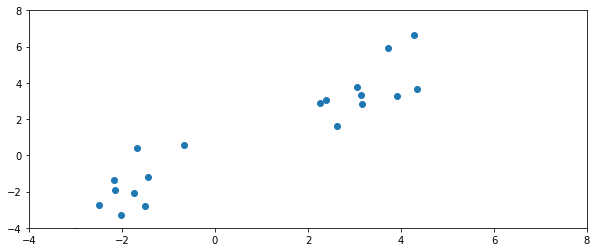

In [23]:
np.random.seed(200)
#x values are spaced out
x=np.append(np.random.normal(size=10,loc=-2, scale=.7),np.random.normal(size=10,loc=3, scale=.7) )

y=x+np.random.normal(size=20,loc=0, scale=1) #true slope is 1, true intercept is 0.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.scatter(x,y)
ax.set_xlim([-4,8])
ax.set_ylim([-4,8])

In [24]:
lm=sm.OLS(y, x).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              154.1
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                    1.46e-10
Time:                        12:34:23   Log-Likelihood:                         -29.888
No. Observations:                  20   AIC:                                      61.78
Df Residuals:                      19   BIC:                                      62.77
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1115      0.090     12.413      0.000       0.924       1.299
==============================================================================
Omnibus:                        1.536   Durbin-Watson:                   2.461
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.197
Skew:                           0.396   Prob(JB):                        0.550
Kurtosis:                       2.101   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              154.1
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                    1.46e-10
Time:                        12:34:26   Log-Likelihood:                         -29.888
No. Observations:                  20   AIC:                                      61.78
Df Residuals:                      19   BIC:                                      62.77
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

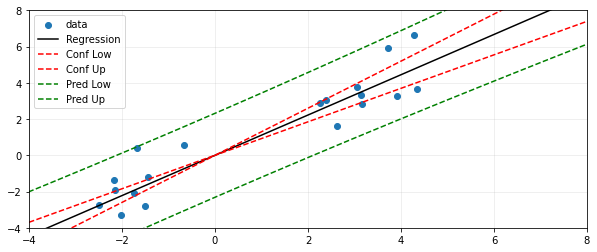

In [25]:
#make a model
lm1=sm.OLS(y, x).fit()

# Inspect the results
xgrd=np.linspace(-10,10,1000) #grid for plotting
#find confidence and predictive intervals all over our plot:
predictions = lm1.get_prediction(xgrd)
predmat=predictions.summary_frame(alpha=0.05)

#plot it all
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,8])
ax.set_ylim([-4,8])
plt.scatter(x,y, label='data')

#Plot each column
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()

print(lm1.summary())

**Fixing Case 1**.  

The usage above *didn't* use an intercept term $\beta_0$.  This is generally a very bad idea!  We should have added a column of 1's to $X$ via 

`X = sm.add_constant(X)`

and then proceeded.  This also means we have to add the "constant" dimension using add constant for our prediction function.  But now we get a much more reasonable result: some uncertainty on whether or not our model should actually go through (0,0).

In [26]:
print(x)
print(sm.add_constant(x))

[-3.01566377 -0.66233281 -1.50168459 -2.1734168  -1.74697364 -2.02306477
 -2.1549427  -1.66592026 -2.48435756 -1.44559585  3.05127439  3.91230022
  3.14943704  3.71214427  4.33819825  2.62922986  4.28949461  2.25993544
  2.3959586   3.16634205]
[[ 1.         -3.01566377]
 [ 1.         -0.66233281]
 [ 1.         -1.50168459]
 [ 1.         -2.1734168 ]
 [ 1.         -1.74697364]
 [ 1.         -2.02306477]
 [ 1.         -2.1549427 ]
 [ 1.         -1.66592026]
 [ 1.         -2.48435756]
 [ 1.         -1.44559585]
 [ 1.          3.05127439]
 [ 1.          3.91230022]
 [ 1.          3.14943704]
 [ 1.          3.71214427]
 [ 1.          4.33819825]
 [ 1.          2.62922986]
 [ 1.          4.28949461]
 [ 1.          2.25993544]
 [ 1.          2.3959586 ]
 [ 1.          3.16634205]]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     135.6
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           8.17e-10
Time:                        12:34:35   Log-Likelihood:                -29.712
No. Observations:                  20   AIC:                             63.42
Df Residuals:                      18   BIC:                             65.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1474      0.260      0.566      0.5

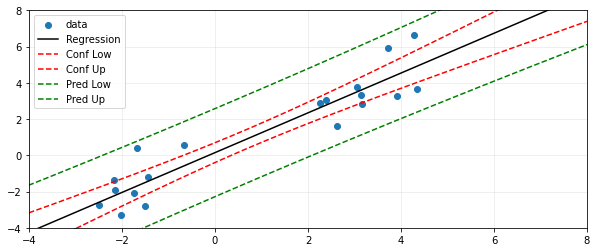

In [27]:
#Proper model:
lm2=sm.OLS(y, sm.add_constant(x)).fit()
print(lm2.summary())

#Prediction
newpred=lm2.get_prediction(sm.add_constant(xgrd))
predmat=newpred.summary_frame(alpha=0.05)

#plot it all
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,8])
ax.set_ylim([-4,8])
plt.scatter(x,y, label='data')
#can't use predmat.mean because bad naming convention
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()

### Case 2: X is clumped up

In this example, all 20 $X$ values are clumped up near zero instead.

(-4.0, 8.0)

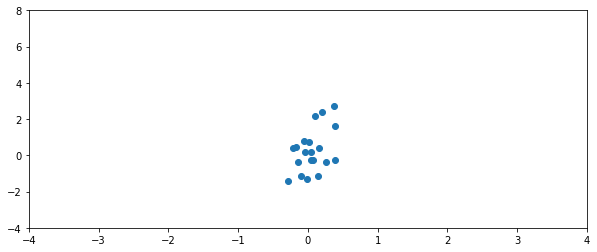

In [28]:
np.random.seed(200)
#x values clustered up near 0
x=np.random.normal(size=20,loc=0, scale=.2)
#x values have an outlier
#x[19]=5
#x values are spaced out
# x=np.append(np.random.normal(size=10,loc=-2, scale=.7),np.random.normal(size=10,loc=3, scale=.7) )
y=x+np.random.normal(size=20,loc=0, scale=1) #true slope is 1, true intercept is 0.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

plt.scatter(x,y)
ax.set_xlim([-4,4])
ax.set_ylim([-4,8])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     4.837
Date:                Wed, 19 Apr 2023   Prob (F-statistic):             0.0412
Time:                        12:34:39   Log-Likelihood:                -29.228
No. Observations:                  20   AIC:                             62.46
Df Residuals:                      18   BIC:                             64.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1105      0.257      0.430      0.6

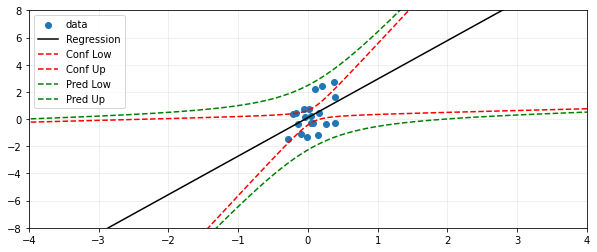

In [29]:

#Proper model:
lm3=sm.OLS(y, sm.add_constant(x)).fit()
print(lm3.summary())
newpred=lm3.get_prediction(sm.add_constant(xgrd))
predmat=newpred.summary_frame(alpha=0.05)

#plot it all

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,4])
ax.set_ylim([-8,8])
plt.scatter(x,y, label='data')

#Plot each column
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()



Look at how quickly we lose a handle on reasonable predictions!  This is because trying to predict `X` values that are far from where we actually observed `X` is called *extrapolation*, and we have no confidence in such a result!

The lack of confidence in inference far from zero is actually a good thing, though.  We have no data out there, so we shouldn't try to draw too strong of conclusions.  Something dangerous can happen if we have *only a little* data far from the other `X` values.

### Case 3: X has a *leverage* point

In this example, the first 19 $X$ values are clumped up near zero... but we also have an x relatively far away.

(-4.0, 10.0)

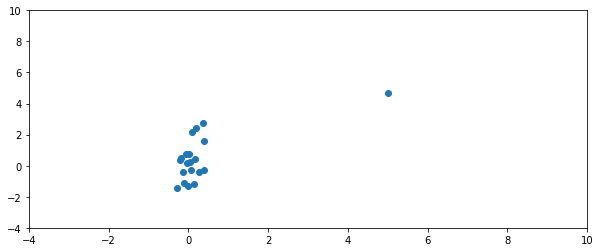

In [30]:
np.random.seed(200)
#x values clustered up near 0
x=np.random.normal(size=20,loc=0, scale=.2)
#x values have an outlier
x[19]=5
y=x+np.random.normal(size=20,loc=0, scale=1) #true slope is 1, true intercept is 0.


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

plt.scatter(x,y)
ax.set_xlim([-4,10])
ax.set_ylim([-4,10])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     15.85
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           0.000877
Time:                        12:34:44   Log-Likelihood:                -30.262
No. Observations:                  20   AIC:                             64.52
Df Residuals:                      18   BIC:                             66.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2337      0.269      0.869      0.3

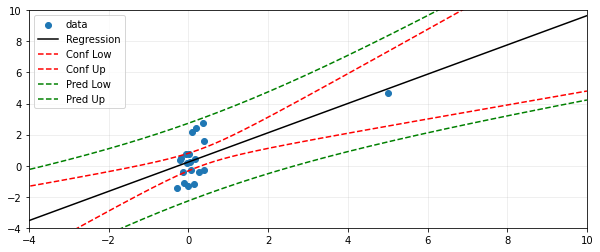

In [31]:

#Proper model:
lm4=sm.OLS(y, sm.add_constant(x)).fit()
print(lm4.summary())
newpred=lm4.get_prediction(sm.add_constant(xgrd))
predmat=newpred.summary_frame(alpha=0.05)

#plot it all

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,10])
ax.set_ylim([-4,10])
plt.scatter(x,y, label='data')

#Plot each column
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()



We're suddenly much more confident in our line!  The one point over at $x=5$ has almost double the size of our t-statistic on $x_1$!  Is this justified?  One way to understand the impact of an individual point is called the *leverage* of that point.  If a point is a large deviation from the other `X` values, it tends to have an enormous effect on the inference in the model.


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
sm.graphics.influence_plot(lm4, ax=ax, criterion="cooks")

Large deviations in `X` are called high influence points, large deviations in `Y` which cause large inference errors are called outliers.

What do you do if you have a high influence point?  Sometimes you just keep it in your model, but when you're writing up your analysis you should explicitly comment:

"The data points in index 19 is very high influence, and is having an undue influence on the rest of the model.  We should be less confident in our results far away from $x=0$ than the confidence bands may suggest!"

In [ ]:
#A few other measures for points that looks like large deviations, if you're interested:
print(lm4.get_influence().summary_frame())

#cook's distance is a good one, but dfb also is a measurement for "x" spread.
#the resid columns at the end measure "y" deviations.